## ML Revolution in Healthcare: The Diabetes Risk Prediction Challenge.
Dive into our project, 'ML Revolution in Healthcare: The Diabetes Risk Prediction Challenge Using BRFSS Survey Data.' With 50,000 responses from the Behavioral Risk Factor Surveillance System at your fingertips, your mission is to navigate data intricacies and class imbalances.

Join the community in constructing various models, including Logistic Regression, Decision Tree, Random Forest, KNN, XGBoost, and AdaBoost. As a registered participant, your task is to preprocess the provided dataset, build robust models, and make predictions on the test data.

This is more than just a challenge; it's an open competition where your skills can reshape the landscape of risk assessment. Your efforts will contribute to proactive interventions and play a vital role in the evolution of public health initiatives.

You're all set! Get ready to make an impact and be a part of the future of healthcare with your innovative machine learning solutions!

**Problem Statement:**
This project addresses the pressing issue of diabetes prevalence in the United States, aiming to predict distinct risk categories using the Behavioral Risk Factor Surveillance System (BRFSS) 2015 dataset. The dataset, comprising 50,000 survey responses, poses a challenge due to class imbalance. The objective is to develop a predictive model that effectively classifies individuals into three categories: 0 for no diabetes/only during pregnancy, 1 for prediabetes, and 2 for diabetes. The emphasis is on mitigating class imbalance to enhance the accuracy of the predictive modeling process.

**About the Dataset:**
The dataset used in this project is sourced from the CDC's Behavioral Risk Factor Surveillance System (BRFSS) 2015, obtained from the UC Irvine Machine Learning Repository. It comprises 21 feature variables and a target variable (Diabetes_012) categorizing respondents into stages: 0 for no diabetes/only during pregnancy, 1 for prediabetes, and 2 for diabetes.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from sklearn.tree import *
from sklearn.linear_model import *
from sklearn.neighbors import *
from xgboost import *
from sklearn.ensemble import *
from sklearn.metrics import *

warnings.filterwarnings("ignore")
from sklearn.preprocessing import *
from sklearn.model_selection import *

### Intial Exploration:
In the initial exploration, the dataset is read, and its shape is checked to understand its structure and dimensions.

In [ ]:
train = pd.read_csv("train_dataset.csv")
test = pd.read_csv("holdout.csv")

In [ ]:
train

### Data Cleaning:
Data preprocessing involves cleaning the dataset by handling missing values, removing duplicates, and addressing any inconsistencies or errors. This ensures the data is accurate and reliable for analysis.

In [ ]:
train_1 = train.drop_duplicates(ignore_index=True)
test_1 = test.drop_duplicates(ignore_index=True)

train_1["Diabetes_012"] = train["Diabetes_012"].astype("int64")

In [ ]:
yes_no_columns = []
for i in train_1.columns.values:
    unique_values = train_1[i].unique()
    if "Yes" in unique_values or "No" in unique_values:
        train_1[i] = train_1[i].map({"Yes":1,"No":0})
        test_1[i] = test_1[i].map({"Yes":1,"No":0})

In [ ]:
train_1["BMI"] = train_1["BMI"].fillna(train_1["BMI"].median())
train_1["PhysActivity"] = train_1["PhysActivity"].fillna(0.0)
train_1["Veggies"] = train_1["Veggies"].fillna(0.0)
train_1["Age"] = train_1["Age"].fillna(train_1["Age"].median())
train_1["Education"] = train_1["Education"].fillna(train_1["Education"].median())
train_1["Income"] = train_1["Income"].fillna(train_1["Income"].median())
train_1["Sex"] = train_1["Sex"].map({"Male":1,"Female":0})

train_1 = train_1.astype("int64")

In [ ]:
test_1["BMI"] = test_1["BMI"].fillna(test_1["BMI"].median())
test_1["PhysActivity"] = test_1["PhysActivity"].fillna(0.0)
test_1["Veggies"] = test_1["Veggies"].fillna(0.0)
test_1["Age"] = test_1["Age"].fillna(test_1["Age"].median())
test_1["Education"] = test_1["Education"].fillna(test_1["Education"].median())
test_1["Income"] = test_1["Income"].fillna(test_1["Income"].median())
test_1["Sex"] = test_1["Sex"].map({"Male":1,"Female":0})

test_1 = test_1.astype("int64")

### Transforming Data:
This step includes transforming variables or features through methods like scaling, normalization, or encoding categorical variables. Transformation ensures that the data is on a consistent scale and format, preventing certain features from dominating the analysis due to their scale.

In [ ]:
cols = test_1.columns.values
mms = MinMaxScaler()

train_2 = train_1.copy()
test_2 = test_1.copy()

train_2[cols] = pd.DataFrame(mms.fit_transform(train_1[cols]),columns=test_1.columns)
test_2 = pd.DataFrame(mms.fit_transform(test_1),columns=test_1.columns)

### Handling Outliers: 
Data preprocessing includes identifying and handling outliers—data points that deviate significantly from the majority. Techniques such as truncation, imputation, or applying statistical methods are employed to manage outliers and prevent them from unduly influencing analysis or modeling.

In [ ]:
sns.boxplot(train_2["BMI"])

In [ ]:
def tackle_outliers(df):
    first_quartile = df["BMI"].quantile(0.25)
    third_quartile = df["BMI"].quantile(0.75)
    inter_quartile_range = abs(third_quartile - first_quartile)
    low = first_quartile - 1.5 * inter_quartile_range
    up = third_quartile + 1.5 * inter_quartile_range
    outliers = df[(df["BMI"]<low) | (df["BMI"]>up)]
    normal_data = df[(df["BMI"]>low) & (df["BMI"]<up)]

    normal_data.reset_index(drop=True, inplace=True)
    outliers.reset_index(drop=True, inplace=True)
    
    return normal_data,outliers

In [ ]:
train_normal,train_outliers = tackle_outliers(train_2)
test_normal,test_outliers = tackle_outliers(train_2)

**Apply the same steps as described above to the holdout data.**

### Data Splitting:
The dataset is split into training and testing sets. The training set is used to train the ML model, and the testing set is used to evaluate its performance.

In [ ]:
X = train_normal.drop(columns=["Diabetes_012"])
y = train_normal["Diabetes_012"]

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42,shuffle=True)

### Model Selection:
Choose an appropriate ML model based on the nature of the problem (classification) and the characteristics of the data. Common models include Logistic Regression, Decision Tree, Random Forest, KNN, XGBoost, and AdaBoost.

In [ ]:
logistic_regression = LogisticRegression()
logistic_regression.fit(X_train,y_train)
y_pred_lr = logistic_regression.predict(X_test)
lr_acc = balanced_accuracy_score(y_test,y_pred_lr)

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train,y_train)
y_pred_dtree = decision_tree.predict(X_test)
dtree_acc = balanced_accuracy_score(y_test,y_pred_dtree)

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)
y_pred_knn = knn.predict(X_test)
knn_acc = balanced_accuracy_score(y_test,y_pred_knn)

xg_boost = XGBClassifier()
xg_boost.fit(X_train,y_train)
y_pred_xg_boost = xg_boost.predict(X_test)
xg_boost_acc = balanced_accuracy_score(y_test,y_pred_xg_boost)

ada_boost = AdaBoostClassifier(n_estimators=3)
ada_boost.fit(X_train,y_train)
y_pred_ada_boost = ada_boost.predict(X_test)
ada_boost_acc = balanced_accuracy_score(y_test,y_pred_ada_boost)

acc_scores = [lr_acc,dtree_acc,knn_acc,xg_boost_acc,ada_boost_acc]
models = ["Logistic Regression","Decision Tree","K Nearest Neighbors","XG Boost","AdaBoost"]

In [ ]:
models[acc_scores.index(max(acc_scores))]

### Model Training:
Train the selected model on the training data. This involves feeding the model the input data and allowing it to learn the patterns within the data.

In [74]:
decision_tree.fit(X,y)

DecisionTreeClassifier()

### Hyperparameter Tuning:
Fine-tune the model's hyperparameters to optimize its performance. This may involve using techniques like grid search or random search.

In [75]:
parameters = {
    "criterion" : ["gini", "entropy", "log_loss"],
    "splitter"  : ["best", "random"],
    "max_depth" : [5,10,15],
    "min_samples_split": [2,5,10],
    "min_samples_leaf": [1,2,4]
}

grid_search = GridSearchCV(estimator=decision_tree,param_grid=parameters,cv=5, n_jobs=-1,verbose=2)
grid_search.fit(X,y)
print("Best Parameters:", grid_search.best_params_)
best_model = grid_search.best_estimator_


Fitting 5 folds for each of 162 candidates, totalling 810 fits
Best Parameters: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 2, 'splitter': 'random'}


### Predicting:
Once the machine learning model is trained and validated, apply it to the holdout data—previously unseen data reserved for testing purposes. This step involves utilizing the trained model to generate predictions or classifications for the holdout dataset, providing insights into how well the model generalizes to new, independent observations.

In [78]:
y_pred = best_model.predict(test_2)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [85]:
df_final = pd.DataFrame(columns=train_1.columns)
df_final["Diabetes_012"] = y_pred
df_final[test_1.columns.values] = test_1.copy()

### Post-Prediction Processing:
Convert Predicted Values to DataFrame and Export to CSV.

In [88]:
df_final.to_csv("predictions.csv",index=False,header=True)

   Diabetes_012 HighBP HighChol CholCheck   BMI Smoker Stroke  \
0           0.0    Yes      Yes       Yes  28.0     No     No   
1           1.0     No      Yes       Yes  38.0     No     No   
2           2.0     No      Yes       Yes   NaN    Yes     No   
3           2.0    Yes       No       Yes  28.0    Yes     No   
4           0.0     No      Yes       Yes  20.0    Yes     No   

  HeartDiseaseorAttack PhysActivity Fruits  ... AnyHealthcare NoDocbcCost  \
0                  Yes          Yes    Yes  ...           Yes          No   
1                   No           No    Yes  ...            No         Yes   
2                   No           No    Yes  ...           Yes          No   
3                   No          Yes     No  ...           Yes          No   
4                   No           No    Yes  ...           Yes          No   

  GenHlth MentHlth  PhysHlth  DiffWalk     Sex   Age Education  Income  
0     3.0      0.0       0.0        No    Male  10.0       6.0     6.0  


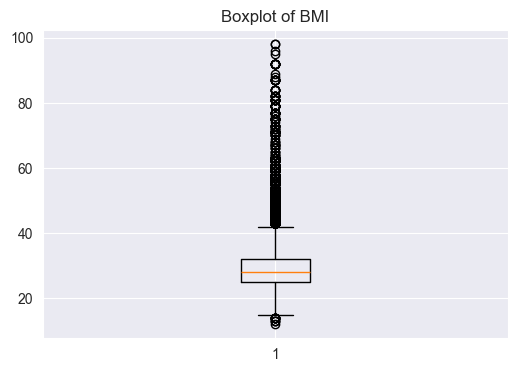

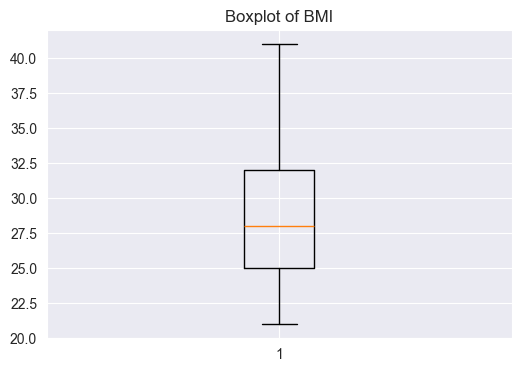

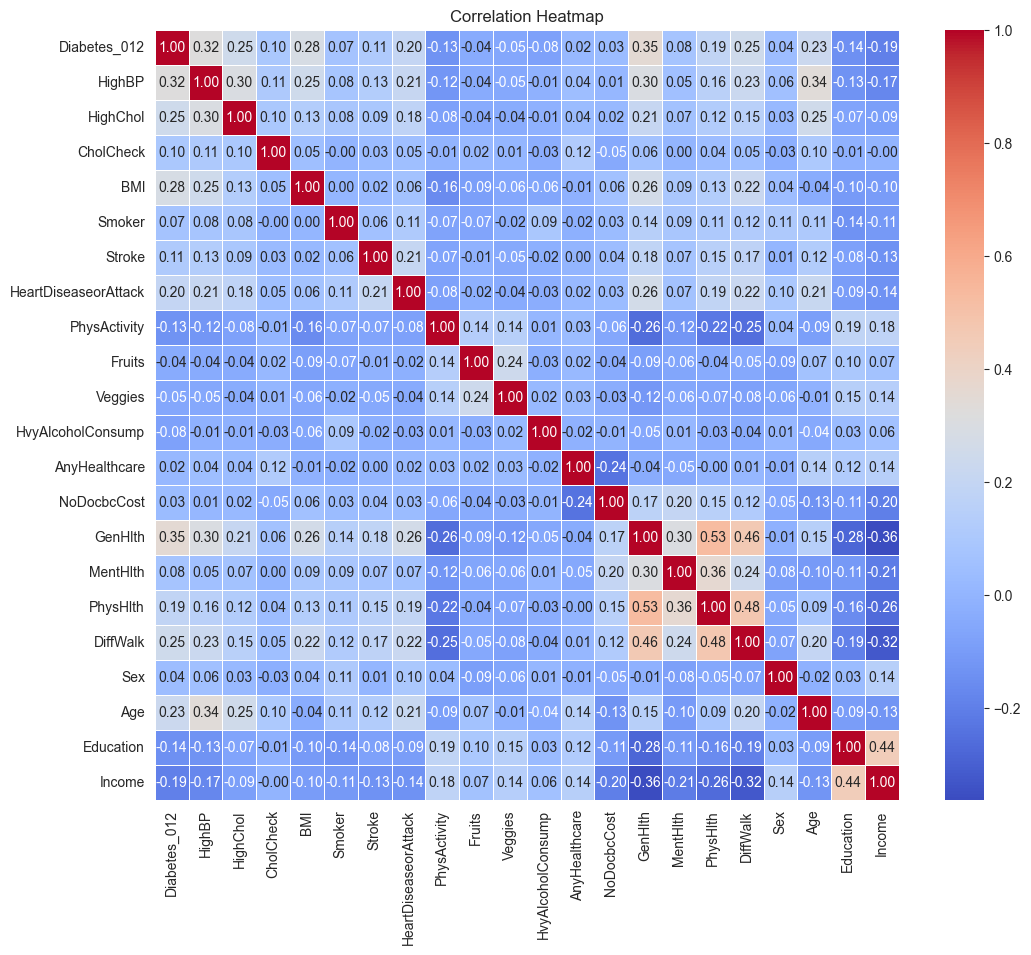

ModuleNotFoundError: No module named 'imblearn'